In [ ]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

# 📥 Load dataset
df = pd.read_csv('/content/Dataset_14-day_AA_depression_symptoms_mood_and_PHQ-9.csv')  # Update the path if needed
print("Initial shape:", df.shape)

# ✅ Step 1: Define PHQ-9 question columns
phq9_cols = ['phq1', 'phq2', 'phq3', 'phq4', 'phq5', 'phq6', 'phq7', 'phq8', 'phq9']

# ✅ Step 2: Drop rows with missing PHQ-9 answers
df = df.dropna(subset=phq9_cols)
print("After dropping PHQ-9 missing:", df.shape)

# ✅ Step 3: Calculate total PHQ-9 score
df['PHQ9_Score'] = df[phq9_cols].sum(axis=1)

# ✅ Step 4: Create binary depression label
df['Depression'] = df['PHQ9_Score'].apply(lambda x: 'Yes' if x >= 10 else 'No')
print("Label counts:\n", df['Depression'].value_counts())

# ✅ Step 5: Drop irrelevant or ID/time-based columns
drop_cols = ['Unnamed: 0', 'user_id', 'time', 'start.time', 'id', 'Depression', 'PHQ9_Score']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['Depression']

# ✅ Step 6: Fill or drop remaining missing values
X = X.fillna(0)  # You can also use df.dropna() if strict data is needed

# ✅ Step 7: Encode categorical features
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col].astype(str))

# ✅ Step 8: Encode target label
y = le.fit_transform(y)  # Yes → 1, No → 0

# ✅ Step 9: Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Initial shape: (16150, 36)
After dropping PHQ-9 missing: (15613, 36)
Label counts:
 Depression
Yes    12524
No      3089
Name: count, dtype: int64



🔍 Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00      2514

    accuracy                           1.00      3123
   macro avg       1.00      1.00      1.00      3123
weighted avg       1.00      1.00      1.00      3123



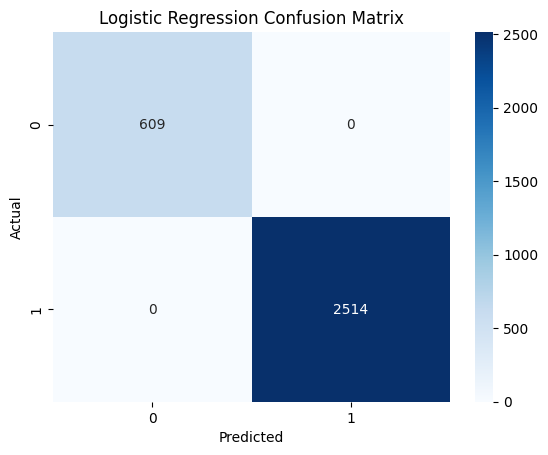


🔍 SVM Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00      2514

    accuracy                           1.00      3123
   macro avg       1.00      1.00      1.00      3123
weighted avg       1.00      1.00      1.00      3123



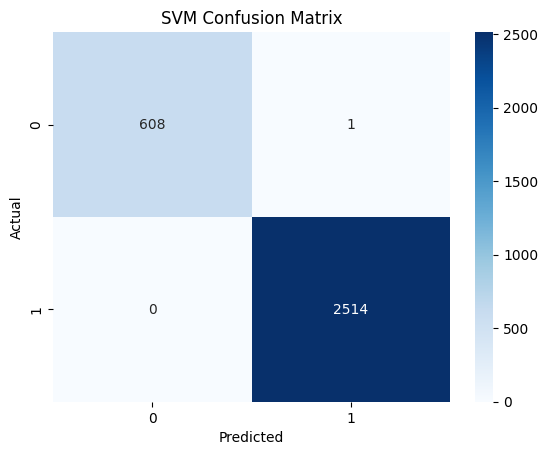


🔍 Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00      2514

    accuracy                           1.00      3123
   macro avg       1.00      1.00      1.00      3123
weighted avg       1.00      1.00      1.00      3123



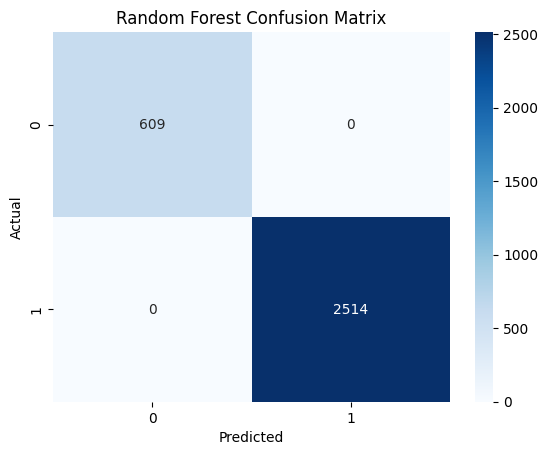


🔍 Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.81       609
           1       0.97      0.93      0.95      2514

    accuracy                           0.92      3123
   macro avg       0.86      0.91      0.88      3123
weighted avg       0.93      0.92      0.92      3123



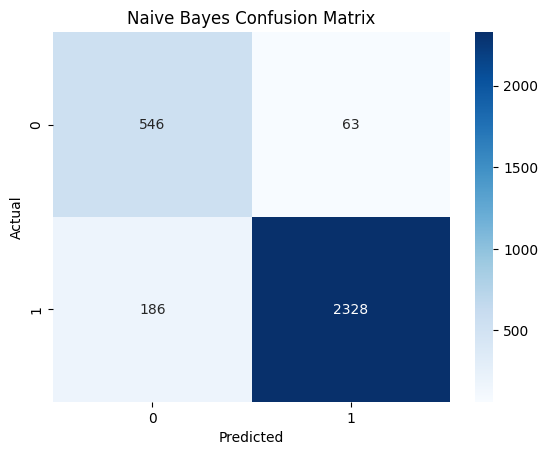

In [ ]:
# ✅ Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"\n🔍 {name} Report:")
    print(classification_report(y_test, y_pred))

    # 📉 Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'user_id', 'phq1', 'phq2', 'phq3', 'phq4', 'phq5', 'phq6',
       'phq7', 'phq8', 'phq9', 'age', 'sex', 'q1', 'q2', 'q3', 'q4', 'q5',
       'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q16', 'q46',
       'q47', 'happiness.score', 'time', 'period.name', 'start.time',
       'phq.day', 'id'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv("/content/Updated_PHQ9_Student_Dataset.csv")  # Change filename as needed

# Define actual PHQ-9 question columns
phq_columns = [
    'Little interest or pleasure in doing things?',
    'Feeling down, depressed, or hopeless?',
    'Trouble falling or staying asleep, or sleeping too much?',
    'Feeling tired or having little energy?',
    'Poor appetite or overeating?',
    'Feeling bad about yourself — or that you are a failure or have let yourself or your family down?',
    'Trouble concentrating on things, such as reading the newspaper or watching television?',
    'Moving or speaking so slowly that other people could have noticed? Or the opposite — being so fidgety or restless that you have been moving around a lot more than usual?',
    'Thoughts that you would be better off dead, or thoughts of hurting yourself in some way?'
]

# Define features and binary target
X = df[phq_columns]
y = (df['PHQ-9 Total Score'] >= 10).astype(int)

# Map PHQ-9 answers to numeric values
phq_map = {
    'Not at all': 0,
    'Several days': 1,
    'More than half the days': 2,
    'Nearly every day': 3
}
X = X.replace(phq_map)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("📊 Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


📊 Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        71

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
 [[ 9  0]
 [ 0 71]]
Accuracy: 1.0


/tmp/ipython-input-4-4019771946.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(phq_map)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("\n📊 SVM Report:")
print(classification_report(y_test, y_pred_svm))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("\n📊 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("\n📊 Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb))

# Gradient Boosting (XGBoost)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
print("\n📊 XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))



📊 SVM Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.96      1.00      0.98        71

    accuracy                           0.96        80
   macro avg       0.98      0.83      0.89        80
weighted avg       0.96      0.96      0.96        80


📊 Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.95      1.00      0.97        71

    accuracy                           0.95        80
   macro avg       0.97      0.78      0.84        80
weighted avg       0.95      0.95      0.94        80


📊 Naive Bayes Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.92      1.00      0.96        71

    accuracy                           0.93        80
   macro avg       0.96      0.67      0.73        80
weighted av

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:21:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Model Comparison Table:
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    1.0000   1.000000     1.0  1.000000
1                  SVM    0.9625   0.959459     1.0  0.979310
2        Random Forest    0.9500   0.946667     1.0  0.972603
3          Naive Bayes    0.9250   0.922078     1.0  0.959459
4              XGBoost    0.9750   0.972603     1.0  0.986111


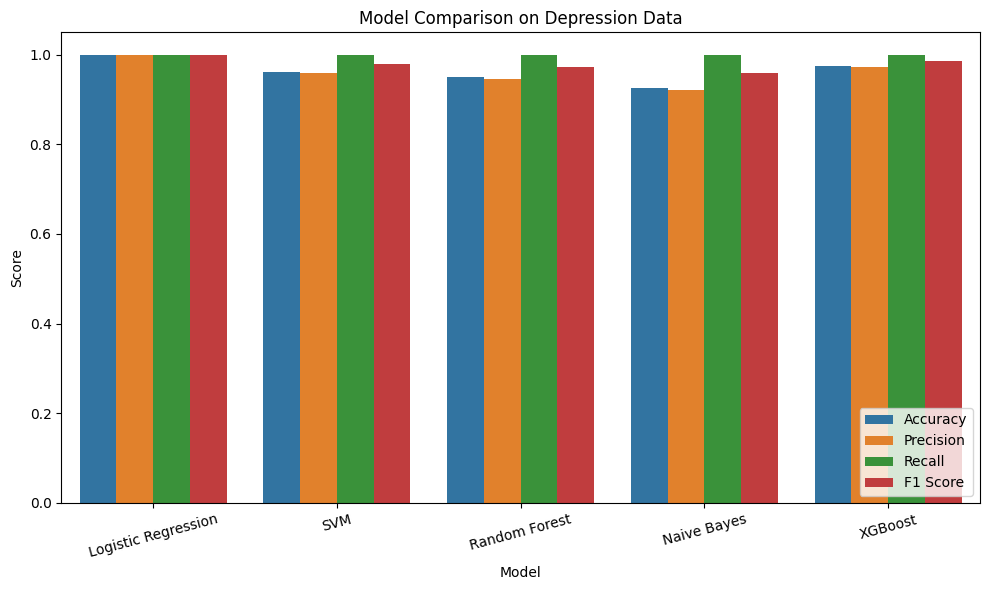

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Results dictionary
results = []

# Train, predict, and collect scores
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison Table:")
print(results_df)

# Plot
plt.figure(figsize=(10,6))
results_melted = pd.melt(results_df, id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted)
plt.title('Model Comparison on Depression Data')
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
